In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.decomposition import PCA
import seaborn as sns

%matplotlib inline

plt.rcParams["figure.figsize"] = [16,9]

In [3]:
train_sj = pd.read_csv('./data/train_sj.csv')
test_sj = pd.read_csv('./data/test_sj.csv')
train_iq = pd.read_csv('./data/train_iq.csv')
test_iq = pd.read_csv('./data/test_iq.csv')

## San Juan Prediction

In [4]:
X_train = train_sj.drop(labels=['total_cases'], axis=1)
y_train = train_sj['total_cases']
X_test = test_sj.drop(labels=['total_cases'], axis=1)
y_test = test_sj['total_cases']

In [4]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [12]:
scores = ["explained_variance" , "neg_mean_absolute_error" ,"neg_mean_squared_error" ,"r2"]
model = MLPRegressor(max_iter=10000)
parameters = {'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=5),
             scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
    
    y_true, y_pred = y_test, clf.predict(X_test).astype(int)
    
    
    print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))
    print("-------------------------------------------------------")
    print()

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'hidden_layer_sizes': (100,)}

Grid scores on development set:

-0.177 (+/-0.464) for {'hidden_layer_sizes': (100,)}

-0.944 (+/-3.308) for {'hidden_layer_sizes': (20, 30)}

-0.583 (+/-2.120) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 21.000000
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'hidden_layer_sizes': (20, 30)}

Grid scores on development set:

-48.263 (+/-70.817) for {'hidden_layer_sizes': (100,)}

-35.493 (+/-20.302) for {'hidden_layer_sizes': (20, 30)}

-38.140 (+/-20.386) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 26.132979
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'hidden_layer_sizes': (100,)}

Grid

In [5]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 26.484043


Text(0.5, 1.0, 'San Juan Prediction')

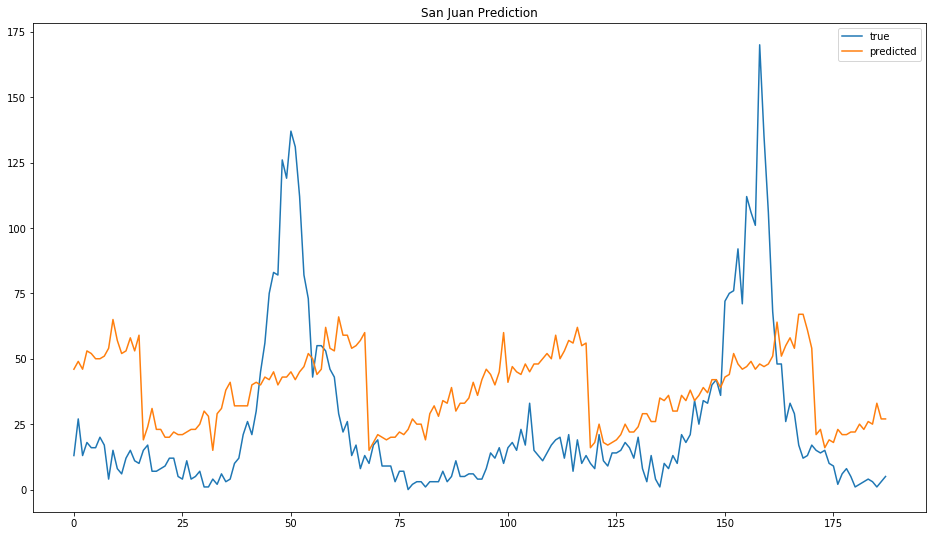

In [8]:
plt.plot(y_true, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('San Juan Prediction')

## Iquitos Prediction

In [9]:
X_train = train_iq.drop(labels=['total_cases'], axis=1)
y_train = train_iq['total_cases']
X_test = test_iq.drop(labels=['total_cases'], axis=1)
y_test = test_iq['total_cases']

In [18]:
MLPRegressor()

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [19]:
scores = ["explained_variance" , "neg_mean_absolute_error" ,"neg_mean_squared_error" ,"r2"]
model = MLPRegressor(max_iter=10000)
parameters = {'hidden_layer_sizes': [(100, ), (20, 30), (13, 13, 13)]}
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, parameters, cv=TimeSeriesSplit(n_splits=5),
             scoring='%s' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
        print()
    
    y_true, y_pred = y_test, clf.predict(X_test).astype(int)
    
    
    print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))
    print("-------------------------------------------------------")
    print()

# Tuning hyper-parameters for explained_variance

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13, 13)}

Grid scores on development set:

-2.731 (+/-8.634) for {'hidden_layer_sizes': (100,)}

-2.498 (+/-7.352) for {'hidden_layer_sizes': (20, 30)}

-1.140 (+/-3.509) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 19.015957
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_absolute_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13, 13, 13)}

Grid scores on development set:

-25.476 (+/-61.879) for {'hidden_layer_sizes': (100,)}

-13.705 (+/-21.399) for {'hidden_layer_sizes': (20, 30)}

-11.887 (+/-15.074) for {'hidden_layer_sizes': (13, 13, 13)}

Mean Absolute Error(MAE): 21.143617
-------------------------------------------------------

# Tuning hyper-parameters for neg_mean_squared_error

Best parameters set found on development set:

{'hidden_layer_sizes': (13

In [10]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_true, y_pred = y_test, clf.predict(X_test).astype(int)
print("Mean Absolute Error(MAE): %f" %MAE(y_true, y_pred))

Mean Absolute Error(MAE): 20.925532


Text(0.5, 1.0, 'Iquitos Prediction')

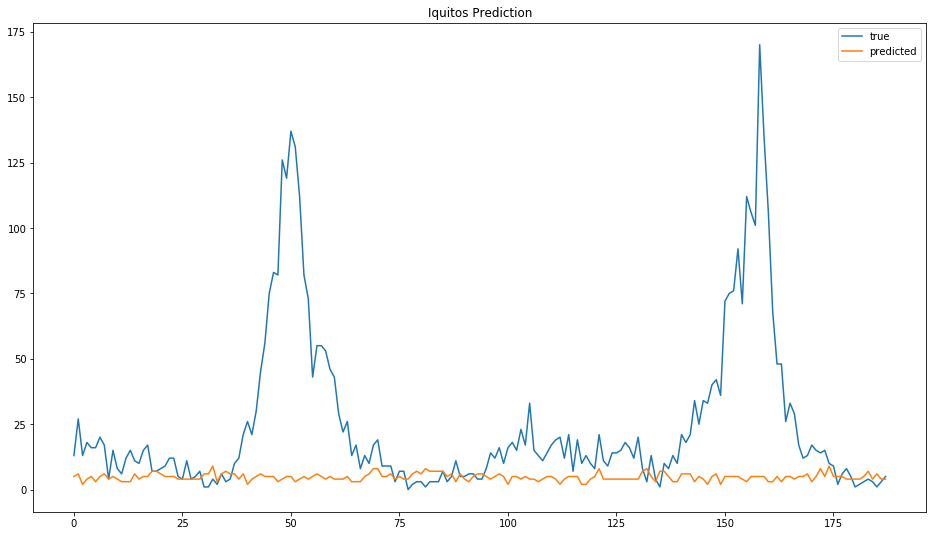

In [11]:
plt.plot(y_true, label='true')
plt.plot(y_pred, label='predicted')
plt.legend()
plt.title('Iquitos Prediction')

## Submission

In [22]:
X_sj_test = pd.read_csv('./data/X_sj_test.csv')
X_iq_test = pd.read_csv('./data/X_iq_test.csv')

### San Juan

In [26]:
X_train = train_sj.append(test_sj, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_sj_test

In [27]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

In [28]:
sub_df_sj = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_sj.insert(0, 'city', 'sj')
sub_df_sj.insert(1, 'year', X_test['year'])
sub_df_sj.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_sj

,city,year,weekofyear,total_cases
0,sj,2008,18,41
1,sj,2008,19,39
2,sj,2008,20,37
3,sj,2008,21,38
4,sj,2008,22,41
5,sj,2008,23,47
6,sj,2008,24,45
7,sj,2008,25,45
8,sj,2008,26,46
9,sj,2008,27,45


### Iquitos

In [29]:
X_train = train_iq.append(test_iq, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_iq_test

In [30]:
clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test).astype(int)

In [31]:
sub_df_iq = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_iq.insert(0, 'city', 'iq')
sub_df_iq.insert(1, 'year', X_test['year'])
sub_df_iq.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_iq

,city,year,weekofyear,total_cases
0,iq,2010,26,11
1,iq,2010,27,10
2,iq,2010,28,10
3,iq,2010,29,10
4,iq,2010,30,10
5,iq,2010,31,12
6,iq,2010,32,9
7,iq,2010,33,10
8,iq,2010,34,9
9,iq,2010,35,9


In [32]:
sub = sub_df_sj.append(sub_df_iq, ignore_index=True)
sub.to_csv('Submission.csv', index = False)

### PCA Submission

In [38]:
X_train = train_sj.append(test_sj, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_sj_test

pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,))
clf.fit(X_train, y_train)
y_pred = np.abs(clf.predict(X_test_pca)).astype(int)

sub_df_sj = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_sj.insert(0, 'city', 'sj')
sub_df_sj.insert(1, 'year', X_test['year'])
sub_df_sj.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_sj

,city,year,weekofyear,total_cases
0,sj,2008,18,19
1,sj,2008,19,5
2,sj,2008,20,4
3,sj,2008,21,2
4,sj,2008,22,3
5,sj,2008,23,20
6,sj,2008,24,14
7,sj,2008,25,28
8,sj,2008,26,6
9,sj,2008,27,21


In [39]:
X_train = train_iq.append(test_iq, ignore_index=True)
y_train = X_train['total_cases']
X_train = X_train.drop(labels=['total_cases'], axis=1)
X_test = X_iq_test

pca = PCA(n_components=5)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=(13,13,13))
clf.fit(X_train, y_train)
y_pred = np.abs(clf.predict(X_test_pca)).astype(int)

sub_df_iq = pd.DataFrame(y_pred, columns=["total_cases"])
sub_df_iq.insert(0, 'city', 'iq')
sub_df_iq.insert(1, 'year', X_test['year'])
sub_df_iq.insert(2, 'weekofyear', X_test['weekofyear'])
sub_df_iq

,city,year,weekofyear,total_cases
0,iq,2010,26,14
1,iq,2010,27,6
2,iq,2010,28,4
3,iq,2010,29,6
4,iq,2010,30,15
5,iq,2010,31,5
6,iq,2010,32,19
7,iq,2010,33,7
8,iq,2010,34,19
9,iq,2010,35,13


In [40]:
sub = sub_df_sj.append(sub_df_iq, ignore_index=True)
sub.to_csv('Submission_pca.csv', index = False)